<a href="https://colab.research.google.com/github/wellsalexandra/IGM-Phase/blob/main/IGM_phaseDiagram_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


In [20]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

def plot_2Dphase_single(box, scale):
  """Plot a 2D temperature-density Phase Diagram of the IGM

    Kwargs:
    box - char/string of the simulatiom box label (either A,B,C, or F)
    scale - scale factor (options within CROC-provided data)
  """

  axis.clear()
  arr = np.load("drive/MyDrive/UoM REU Project 2023/igm_phase_data/" + box + "/nT.a=" + str(scale).ljust(6, "0") +".bin.npy")

  map = axis.imshow(np.log10(arr), extent = [-2, 3, 0, 6], origin = 'lower', vmin = -6, vmax = 2)
  cb = fig.colorbar(mappable = map)
  cb.set_label(label="log10(Probabilty)", fontsize='xx-large')
  axis.set_xlabel("log10(1+δ)", fontsize='xx-large')
  axis.set_ylabel("log10(T/K)", fontsize='xx-large')
  axis.set_title("Phase Diagram for Scale Factor a = " + str(scale).ljust(6, "0"), fontsize='x-large')
  axis.annotate("Box: " + box + "", [-1.9, 5.6], fontsize= 'x-large')

  plt.xticks(fontsize='large')
  axis.xaxis.set_minor_locator(MultipleLocator(0.2))
  plt.yticks(fontsize='large')
  axis.yaxis.set_minor_locator(MultipleLocator(0.2))

  plt.show(fig)


<ipython-input-20-9ee1e567b16d>:14: RuntimeWarning: divide by zero encountered in log10
  map = axis.imshow(np.log10(arr), extent = [-2, 3, 0, 6], origin = 'lower', vmin = -6, vmax = 2)


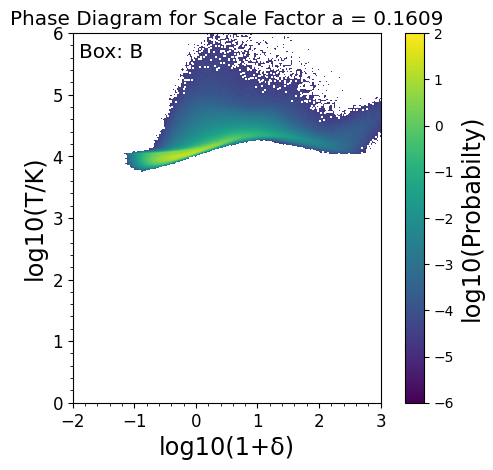

In [37]:
fig = plt.figure()
axis = plt.axes()

plot_2Dphase_single('B', 0.1609)

In [38]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def subplot_2Dphase(box, scale, index):
  """Plot a subplot if multiple 2D temperature-density Phase Diagrams of the IGM

    Kwargs:
    box - char/string of the simulatiom box label (either A,B,C, or F)
    scale - scale factor (options within CROC-provided data)
    index - axis index of the subplot
  """

  arr = np.load("drive/MyDrive/UoM REU Project 2023/igm_phase_data/" + box + "/nT.a=" + str(scale).ljust(6, "0") +".bin.npy")

  # Normalize array
  sum = np.sum(arr)
  arr = arr/sum

  map = axis[index].imshow(np.log10(arr), extent = [-2, 3, 0, 6], origin = 'lower', vmin = -9, vmax =-2)

  xmin=-1
  xmax=2
  ymin=1
  ymax=5
  axis[index].set_xlim(xmin, xmax)
  axis[index].set_ylim(ymin, ymax)

  plt.xticks(fontsize='large')
  axis[index].xaxis.set_minor_locator(MultipleLocator(0.2))
  axis[0].yaxis.set_minor_locator(MultipleLocator(0.2))

  axis[index].set_xlabel("log10(1+δ)", fontsize='xx-large')
  axis[0].set_ylabel("log10(T/K)", fontsize='xx-large')
  axis[1].set_title("Phase Diagram for Scale Factor a = " + str(scale).ljust(6, "0"), fontsize='xx-large')


  ### Format annotations correctly for each of the 3 panels of the suplot
  if(index == 0):
    axis[index].annotate("Scale Factor =  " + str(scale).ljust(6, "0") + "", [xmin+0.1, ymax-0.3], fontsize= 'large')
  elif(index == 1):
    axis[index].annotate("Scale Factor =  " + str(scale).ljust(6, "0") + "", [xmin+0.12, ymin+0.16], fontsize= 'large')
  elif(index == 2):
    axis[index].annotate("Scale Factor =  " + str(scale).ljust(6, "0") + "", [xmin+0.12, ymin+0.16], fontsize= 'large')

<ipython-input-38-47bd4220acef>:17: RuntimeWarning: divide by zero encountered in log10
  map = axis[index].imshow(np.log10(arr), extent = [-2, 3, 0, 6], origin = 'lower', vmin = -9, vmax =-2)
<ipython-input-39-9ba8d1c6cfbb>:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


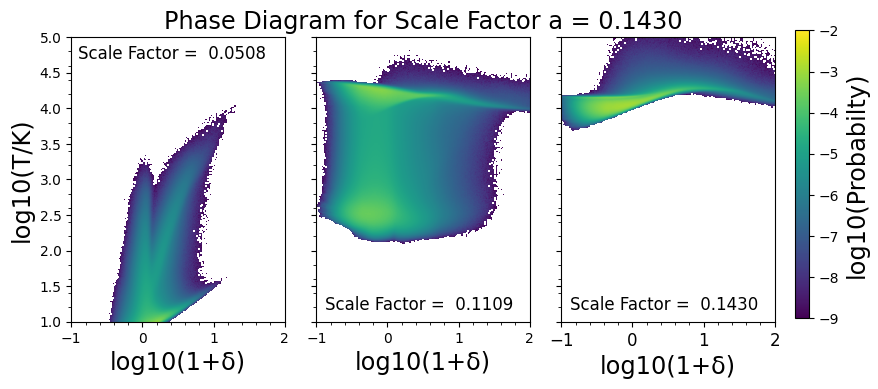

In [39]:
# Plot panel of 3 on subplot of same figure
fig, axis = plt.subplots(ncols=3, figsize=(8, 4), sharey=True, sharex=True)

# The 3 scale factors used in the paper for this figure:
subplot_2Dphase('B', 0.0508, 0)
subplot_2Dphase('B', 0.1109, 1)
subplot_2Dphase('B', 0.1430, 2)
plt.yticks()

### Because of errors when creating colorbar inside the function,
### We can instead do that here.
### Creates and positions the colorbar:
cbar_width = 0.0175
cbar_height = 0.72
cbar_xpos = 1.0  # The x-position of the colorbar
cbar_ypos = 0.19  # The y-position of the colorbar
cbar_pos = [cbar_xpos, cbar_ypos, cbar_width, cbar_height]

# Add the colorbar to the figure
cb = fig.colorbar(axis[2].get_images()[0], cax=fig.add_axes(cbar_pos))
cb.set_label(label="log10(Probabilty)", fontsize='xx-large')

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
